# TITANIC: analisis y visualizacion.

    

In [ ]:
    Desarrollar introduccion, puntos:
        competicion kaggle y algo mas
        introduccion titanic catastrofe.
        objectivos: tranformacion, analisis, visualizacion, modelo de prediccion.
        herramientas que usaremos

### Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [11]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    Distribucion de las edades y el precio del billete

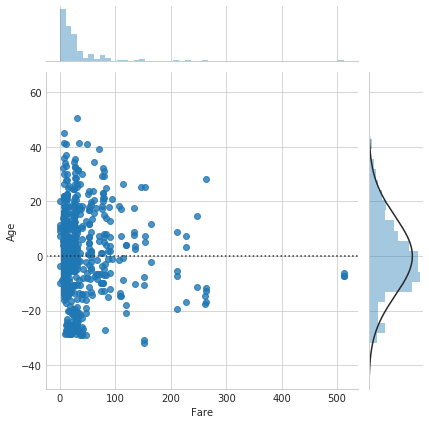

In [14]:
sns.jointplot(x='Fare', y='Age', data = df, kind ='resid')
#Errores en la distribucion, modificr y arreglar

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Edades medias segun la clase de billete.

In [24]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
Numero de menores de edad segun la clase de billete.

In [68]:
kids = df[(df['Age']<18) & (df['Survived']==1)]
kids.groupby('Pclass')['Age'].count()

Pclass
1    11
2    21
3    29
Name: Age, dtype: int64

Media de edad de menores de edad(18 años) por clase de billete.

In [70]:
kids.groupby('Pclass')['Age'].mean()

Pclass
1    13.083636
2     5.730000
3     7.480000
Name: Age, dtype: float64

Ahora quisieramos ver las edades de todos los niños de primera clase, puesto que es donde menos niños habia y
es un numero relativamente pequeño.

In [71]:
df[(df['Age']<18) & (df['Pclass']==1)]['Age']

297     2.00
305     0.92
307    17.00
329    16.00
435    14.00
445     4.00
504    16.00
550    17.00
689    15.00
781    17.00
802    11.00
853    16.00
Name: Age, dtype: float64

    Podemos apreciar que a pesar de que la media de edad es 13 años, solo hay 3 menores de 12 años frente a los 8 adolescentes. Por lo cual, nos atrevemos a decir que es usar mean o count en determiandos rango para analizar el dataset seria error. Vamos a continuacion a visualizar en unos graficos.

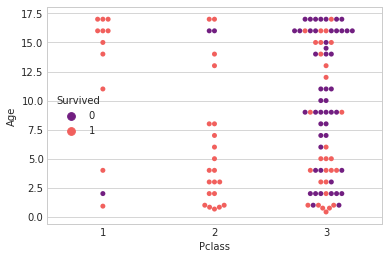

In [62]:
kids = df[df['Age']<18]
sns.swarmplot(x='Pclass',y='Age',data=kids, hue='Survived', palette='magma')

Sin embargo ahora queremos ver la distribucion de edades segun la clase del billete y que sean mayores de edad (18 o más)

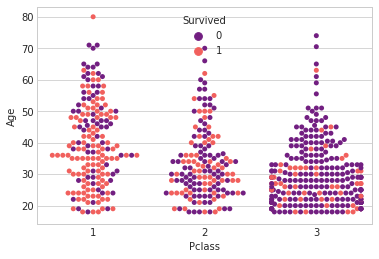

In [74]:
adults = df[df['Age']>=18]
sns.swarmplot(x='Pclass',y='Age',data=adults, hue='Survived', palette='magma')

A simple vista podemos ver que cuanto más barato era tu billete más posibilidades de morir tenias.